In [1]:
import sys
try:
    from Optimizer import minimize
except:
    from Implementation.Optimizer import minimize

try:
    sys.path.append('../AutoDiff')
    from variables import Variable
except:
    from AutoDiff.variables import Variable

    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def plot_path_2D(val_arr,x_grid,y_grid,f_grid,title):
    

    plt.contourf(x_grid, y_grid, f_grid, cmap='Blues',
                    norm=colors.LogNorm(vmin=f_grid.min(), vmax=f_grid.max())
                    )
    plt.colorbar(orientation='horizontal')

    v0 = val_arr[0]
    vends=val_arr[-1]
    plt.plot(val_arr[:, 0], val_arr[:, 1], label='path',color='black',
                linewidth=3.0)

    plt.scatter(v0[0], v0[1], s=100, color='red', label='start')
    plt.scatter(vends[0], vends[1], s=100, color='black', label='minimum')

    plt.legend(fontsize=14)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Start = [{0}, {1}]'.format(v0[0], v0[1]), fontsize=16)

    plt.xlim([x_grid.min(), x_grid.max()])
    plt.ylim([y_grid.min(), y_grid.max()])

In [3]:
def f1(x, y): return 100*(y-x**2)**2 + (1-x)**2
res = minimize(f1, [-1,1], method="Steepest Descend")


In [4]:
x_grid = np.linspace(-3, 3, 150)
y_grid = np.linspace(-3, 4, 200)
f_grid = f1(x_grid.reshape(1, -1),
           y_grid.reshape(-1, 1))

In [5]:
res.val_rec

array([[-1.        ,  1.        ],
       [-0.99497478,  1.        ],
       [-0.99497466,  0.98997435],
       ...,
       [ 0.91056594,  0.8291272 ],
       [ 0.91083399,  0.82912814],
       [ 0.91083229,  0.82961236]])

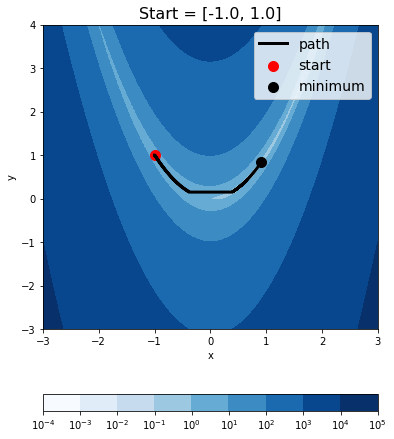

In [6]:
plt.figure(figsize=(6,8))
plot_path_2D(res.val_rec,x_grid,y_grid,f_grid,"BFGS")
